### Improving a Data Scientist jobs search with NLP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel("data/indeed_jobs.xlsx")

**Basic exploration**

In [3]:
df.shape


(540, 7)

In [4]:
df.head(5)


,Unnamed: 0,Título,Empresa,Local,Salário,Avaliação,Descrição
0,0,Cientista de Dados,Criart Serviços de Terceirização de Mão de Obr...,"Belo Horizonte, MG",R$ 9.500 por mês,NaN,"Experiência em estatística descritiva, modelos..."
1,1,Cientista de Dados,innolevels,Home office in Remoto+1 location,R$ 10.000 - R$ 12.000 por mês,NaN,"Classificação, regressão, clustering, redes ne..."
2,2,Cientista de Dados,Intera,"Home office in São Paulo, SP",Tempo integral +1,NaN,Experiência com pacotes de análise de dados (P...
3,3,Analista de Dados / GCP,Innolevels,Home office in Remoto,R$ 5.000 - R$ 10.000 por mês,NaN,Candidate-se a nossa vaga que teremos o grande...
4,4,Pessoa Cientista de Dados Pleno,Aquarela Analytics,Home office,NaN,NaN,Conhecimento em vários tipos de banco de dados...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  540 non-null    int64  
 1   Título      540 non-null    object 
 2   Empresa     540 non-null    object 
 3   Local       540 non-null    object 
 4   Salário     189 non-null    object 
 5   Avaliação   0 non-null      float64
 6   Descrição   240 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 29.7+ KB


In [6]:
# remove column=Unnamed
df = df.drop(
    columns=[
        "Unnamed: 0",
    ]
)


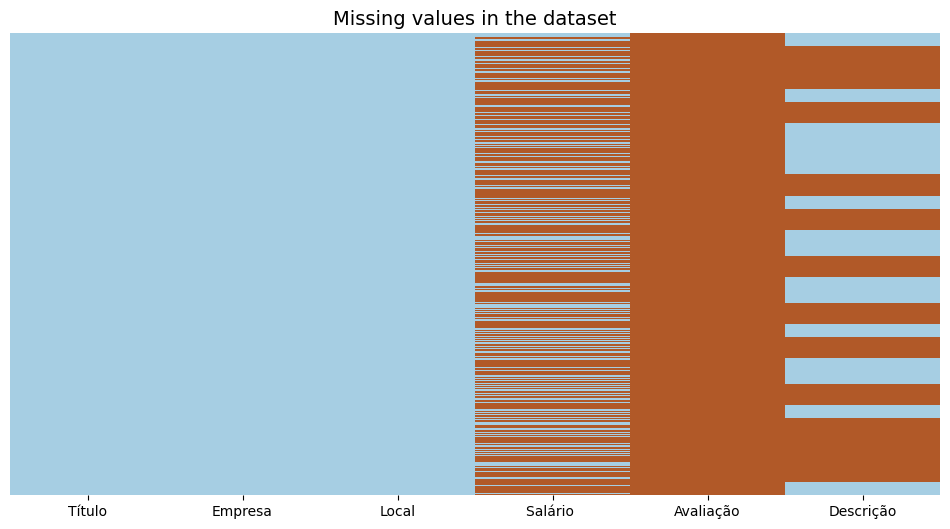

In [7]:
# check missing values of all the columns

plt.figure(figsize=(12, 6))

sns.heatmap(df.isnull(), cbar=False, cmap="Paired", yticklabels=False, fmt=".1g")
plt.title("Missing values in the dataset", size=14)

plt.show()

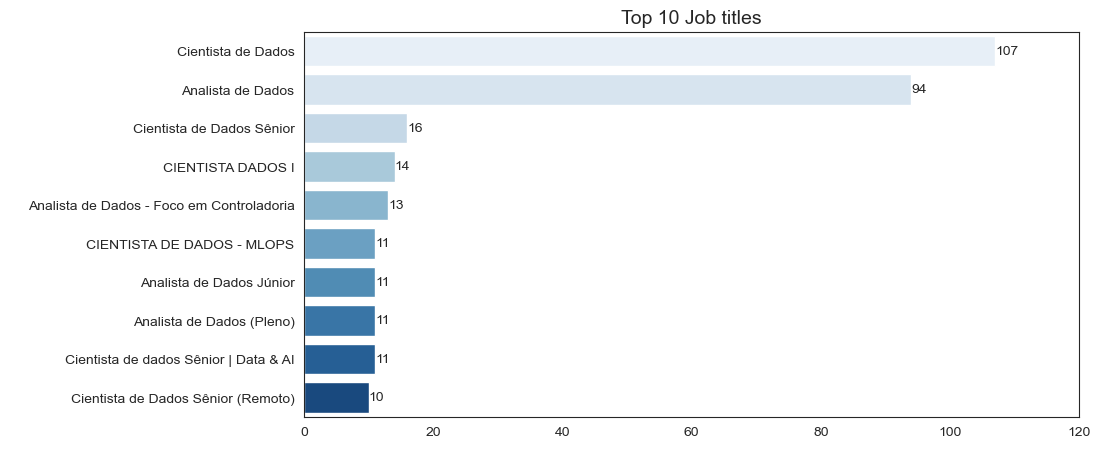

In [8]:
plt.figure(figsize=(10, 5))
sns.set_style("white")
ax = sns.countplot(
    data=df,
    y="Título",
    palette="Blues",
    order=pd.value_counts(df["Título"]).iloc[:10].index,
)

ax.set_xlabel(" ")
ax.set_ylabel(" ")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(x=width, y=p.get_y() + (height / 2),
            s="{:.0f}".format(width), va="center")

plt.xlim(0, 120)
plt.title("Top 10 Job titles", size=14)

plt.show()


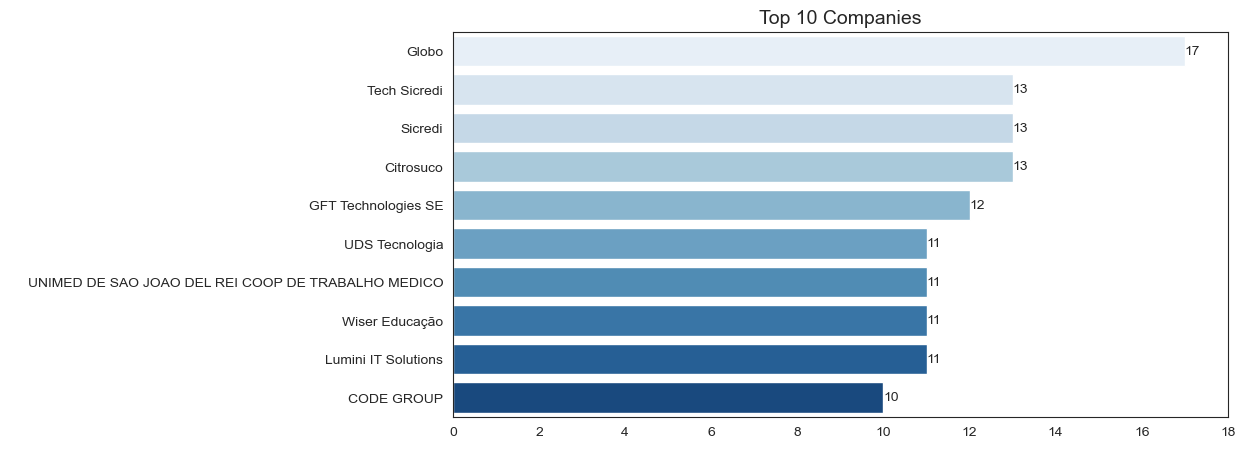

In [9]:
plt.figure(figsize=(10, 5))
sns.set_style("white")
ax = sns.countplot(
    data=df,
    y="Empresa",
    palette="Blues",
    order=pd.value_counts(df["Empresa"]).iloc[:10].index,
)

ax.set_xlabel(" ")
ax.set_ylabel(" ")


xticklabels = [int(label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(x=width, y=p.get_y() + (height / 2), s="{:.0f}".format(width), va="center")


plt.xlim(0, 18)
plt.title("Top 10 Companies", size=14)


plt.show()

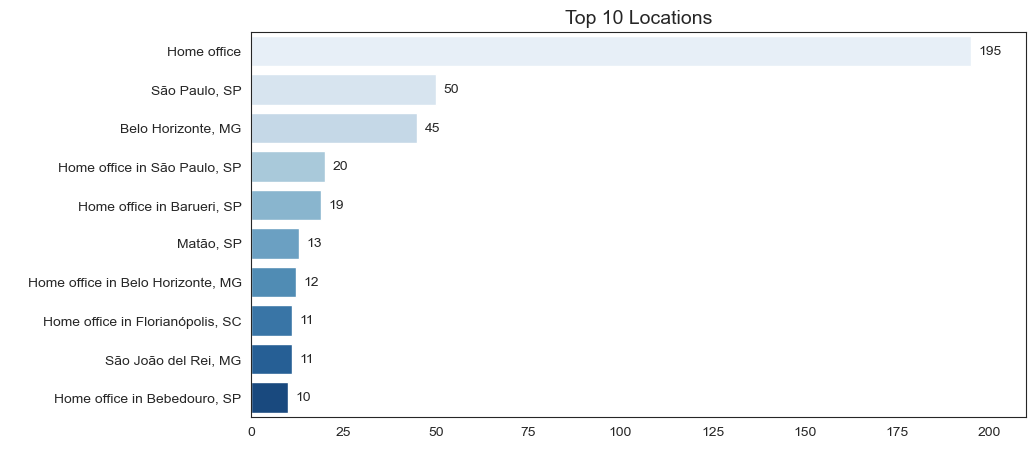

In [10]:
plt.figure(figsize=(10, 5))
sns.set_style("white")
ax = sns.countplot(
    data=df,
    y="Local",
    palette="Blues",
    order=pd.value_counts(df["Local"]).iloc[:10].index,
)

ax.set_xlabel(" ")
ax.set_ylabel(" ")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(
        x=width + 2, y=p.get_y() + (height / 2), s="{:.0f}".format(width), va="center"
    )

plt.xlim(0, 210)
plt.title("Top 10 Locations", size=14)

plt.show()


**NLP**

In [11]:
import gensim
from gensim import corpora

import string
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import nltk
from nltk.corpus import stopwords

import pyLDAvis
import matplotlib.pyplot as plt
import re

pyLDAvis.enable_notebook()
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayaradaher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Data cleaning

In [12]:
def pre_text_processing(corpus):
    # tokenization
    corpus_alt = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
    # lowcase
    corpus_alt = [t.lower() for t in corpus_alt]
    # remove stopwords
    portugues_stops = stopwords.words("portuguese")
    corpus_alt = [t for t in corpus_alt if t not in portugues_stops]
    # remove punctuations
    corpus_alt = [t for t in corpus_alt if t not in string.punctuation]

    return corpus_alt

In [13]:
# drop rows that has NaN values on 'Descrição' column
df2 = df.dropna(subset=["Descrição"])

In [14]:
description = df2["Descrição"].values.astype(str)

In [15]:
description_clean = [pre_text_processing(e) for e in description]


##### Bag of Words

In [16]:
dictionary = corpora.Dictionary(description_clean)


In [17]:
doc_bow = [dictionary.doc2bow(doc) for doc in description_clean]


##### LDA

In [18]:
# creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel


In [19]:
# running and Trainign LDA model on the document term matrix
ldamodel = Lda(
    doc_bow,
    num_topics=3,
    id2word=dictionary,
    passes=1000,
    random_state=123,
    alpha="auto",
    per_word_topics=True,
)

In [20]:
ldamodel.show_topics()


[(0,
  '0.087*"dados" + 0.031*"experiência" + 0.028*"conhecimento" + 0.023*"…" + 0.020*"sql" + 0.015*"bancos" + 0.015*"análise" + 0.014*"ferramentas" + 0.013*"excel" + 0.011*"bases"'),
 (1,
  '0.071*"dados" + 0.041*"…" + 0.017*"time" + 0.016*"sql" + 0.014*"estatística" + 0.013*"experiência" + 0.010*"computação" + 0.010*"ciência" + 0.008*"r" + 0.008*"matemática"'),
 (2,
  '0.028*"modelos" + 0.016*"dados" + 0.015*"…" + 0.014*"machine" + 0.014*"learning" + 0.012*"clientes" + 0.012*"time" + 0.012*"estatística" + 0.010*"lado" + 0.010*"30h"')]

##### LDAvis

In [21]:
pyLDAvis.enable_notebook()


In [22]:
LDAvis_prepared = gensimvis.prepare(ldamodel, doc_bow, dictionary)


In [23]:
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.037855 -0.141487       1        1  42.079919
0     -0.141220  0.095827       2        1  37.705445
2      0.179075  0.045660       3        1  20.214636, topic_info=                Term        Freq       Total Category  logprob  loglift
4            modelos   28.000000   28.000000  Default  30.0000  30.0000
38      conhecimento   43.000000   43.000000  Default  29.0000  29.0000
72              time   30.000000   30.000000  Default  28.0000  28.0000
272            excel   16.000000   16.000000  Default  27.0000  27.0000
22             dados  215.000000  215.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
69         processos    5.531046   19.032956   Topic3  -4.7800   0.3630
39   desenvolvimento    5.088642   17.320455   Topic3  -4.8634   0.3739
3        experiência    5.531046   62.570927   Topic3  -4.7800  -0.8272
61          realizar    4.022558   12.322987   Topic3  -5.0985   0.4792
132            tempo    4.022558    5.445724   Topic3  -5.0985   1.2959

[170 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
175       3  0.934788           100
485       3  0.874981           30h
251       2  0.916963     admitidos
188       1  0.971499   alimentação
21        1  0.319090       análise
...     ...       ...           ...
187       3  0.934788        vindos
330       2  0.905862  visualização
20        1  0.600439             …
20        2  0.294953             …
20        3  0.105340             …

[171 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

##### Word cloud

In [24]:
from wordcloud import WordCloud, STOPWORDS


In [25]:
cloud = " ".join(w for w in description)


In [26]:
stopwords = set(STOPWORDS)


In [27]:
# remover alguns stopwords manualmente
stopwords.update(
    [
        "o",
        "os",
        "e",
        "é",
        "da",
        "de",
        "do",
        "dos",
        "na",
        "no",
        "um",
        "em",
        "que",
        "para",
        "pela",
        "por",
        "ou",
        "como",
        "seu",
        "sua",
        "se",
        "há",
    ]
)

In [28]:
def plot_wordcloud(wc):
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.imshow(wc, interpolation="bilinear")
    ax.set_axis_off()
    plt.imshow(wc)


/opt/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


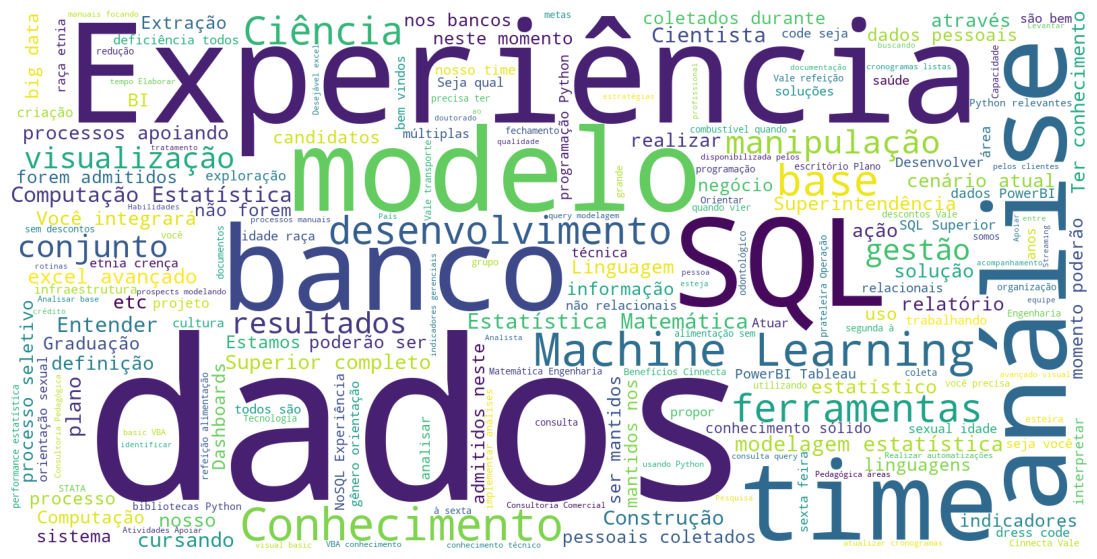

In [29]:
wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    random_state=42,
    width=1600,
    height=800,
).generate(cloud)

plot_wordcloud(wc)

**Análise de frequência**

In [30]:
import nltk
from nltk.probability import FreqDist
from unidecode import unidecode

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayaradaher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def pre_text_processing(corpus):
    # tokenization
    corpus_alt = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
    # lowcase
    corpus_alt = [t.lower() for t in corpus_alt]
    # remove stopwords
    portuguese_stops = stopwords.words("portuguese")
    corpus_alt = [t for t in corpus_alt if t not in portuguese_stops]
    # remove numbers
    corpus_alt = [re.sub(r"\d", "", t) for t in corpus_alt]
    # remove punctuations
    corpus_alt = [t for t in corpus_alt if t not in string.punctuation]
    # remove accents
    corpus_alt = [unidecode(t) for t in corpus_alt]

    return corpus_alt

In [32]:
# text cleaning (using Regex)
description_clean2 = " ".join([str(elem) for elem in description_clean])
description_clean2 = re.sub(r"[[',]", "", description_clean2)
description_clean2 = re.sub(r"[]]", "", description_clean2)
description_clean2 = re.sub(r"[…]", "", description_clean2)

In [33]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mayaradaher/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
words = nltk.tokenize.word_tokenize(description_clean2)


In [35]:
FreqDist(words)
fd_words = FreqDist(words)


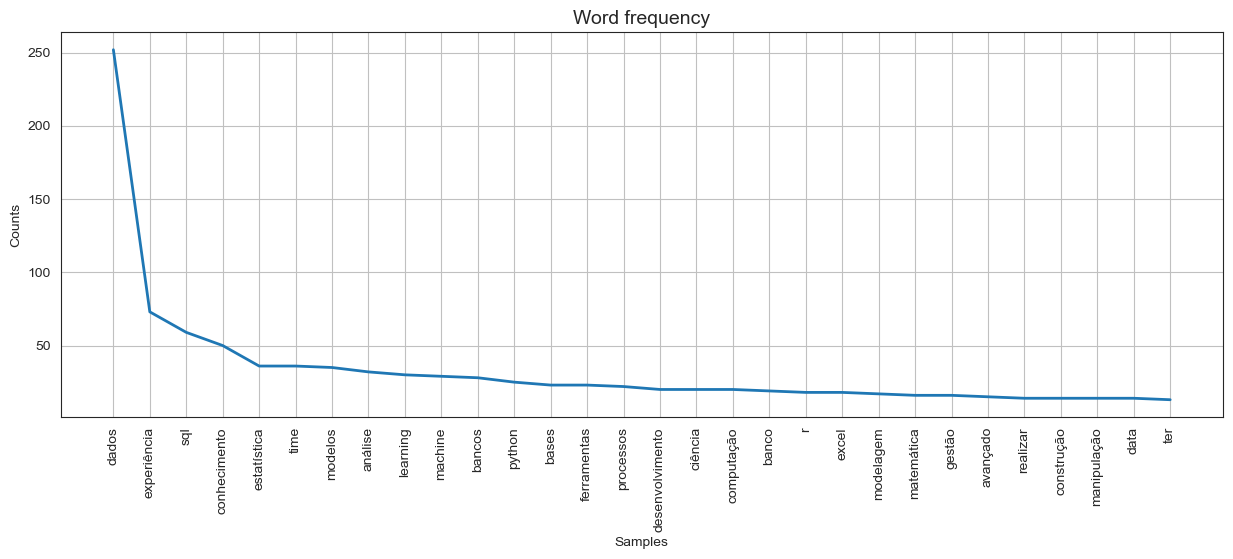

In [36]:
plt.figure(figsize=(15, 5))

plt.title("Word frequency", size=14)

fd_words.plot(30)

plt.show()


In [37]:
# the 10 most common words
fd_words.most_common(10)


[('dados', 252),
 ('experiência', 73),
 ('sql', 59),
 ('conhecimento', 50),
 ('estatística', 36),
 ('time', 36),
 ('modelos', 35),
 ('análise', 32),
 ('learning', 30),
 ('machine', 29)]